<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title : Exe23 - Dimension Reduction Exercise

#### Name: Chuay Xiang Ze

#### IC Number: 021224070255

#### Date : 25/07/2023

#### Introduction : Learning on Dimension Reduction using python.



#### Conclusion : Managed to complete tasks relating to the topic.






# Dimension Reduction Exercise

## Principal Component Analysis

Let's begin by importing the various library 

In [5]:
import pandas as pd
import numpy as np

In [130]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
# Combine the data and target arrays
data = breast.data

# Create a dictionary with column names as keys and data arrays as values
data_dict = {name: data[:, i] for i, name in enumerate(breast.feature_names)}

# Create the DataFrame
df = pd.DataFrame(data_dict)
df['target'] = breast.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [131]:
breast.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [135]:
data.shape

(569, 30)

In [158]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, 0:30].values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

pca = PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,svd_solver='auto', tol=0.0, whiten=False)
pca.fit(scaled_data)
x_pca = pca.fit_transform(scaled_data)
x_pca.shape

(569, 2)

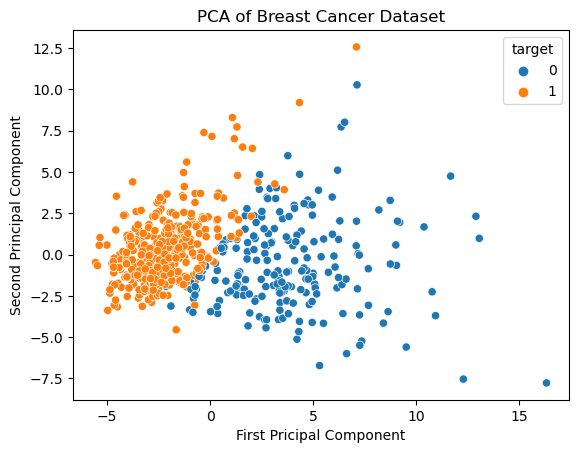

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

pca_df = pd.DataFrame(x_pca,
                      columns=['First Pricipal Component',
                               'Second Principal Component'])

pca_df['target'] = breast.target

sns.scatterplot(x='First Pricipal Component',
                y='Second Principal Component',
                hue='target',
                data=pca_df)

plt.title('PCA of Breast Cancer Dataset')
plt.show()

In [161]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

<Axes: >

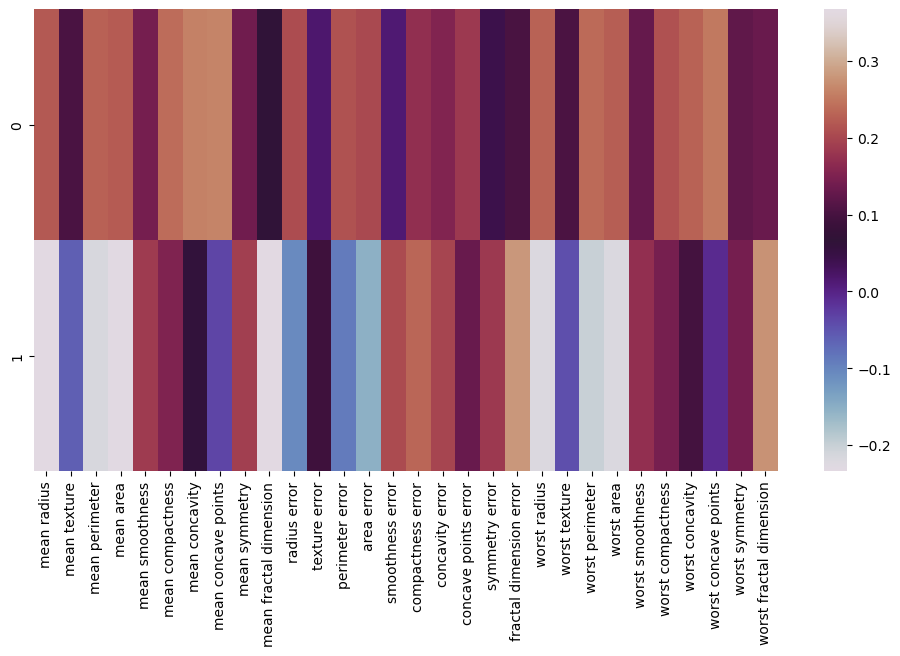

In [165]:
map_df = pd.DataFrame(pca.components_, columns=breast['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(map_df,cmap='twilight')

## PCA Exercise

In [3]:
#1. Import the wine dataset and assign it to a variable. Split the data into two components X and Y (https://www.geeksforgeeks.org/principal-component-analysis-with-python/)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("./Wine.csv")
data.head()
X = data.iloc[:, 0:13].values
y = data.iloc[:, 13].values

In [4]:
data['Customer_Segment'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [7]:
#2. Split the dataset into the Training and the Test set. Set the test set to 0.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [106]:
#3. Scale the train and test set using the StandardScaler
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
X_train_scaled = model.fit_transform(X_train)
X_test_scaled = model.transform(X_test)

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [108]:
#4. Apply the PCA function to both the test and train set, to extract the first two principal components
pca.explained_variance_ratio_

array([0.36196226, 0.18763862])

In [114]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train_pca, y_train)

LogisticRegression()

In [115]:
#5. Create a Logistic Regression based on the training set


In [116]:
#6. Apply the created LR model onto the test data
# Predicting the test set result using  
# predict function under LogisticRegression  
from sklearn.linear_model import LogisticRegression
y_pred = logr.predict(X_test_pca)
y_pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 2, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 2, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3], dtype=int64)

In [117]:
#7. Create a confusion matrix to score the prediction performed
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[17  2  0]
 [ 0 21  0]
 [ 0  0 14]]


C:\Users\Xiang Ze\AppData\Local\Temp\ipykernel_11056\2160364856.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


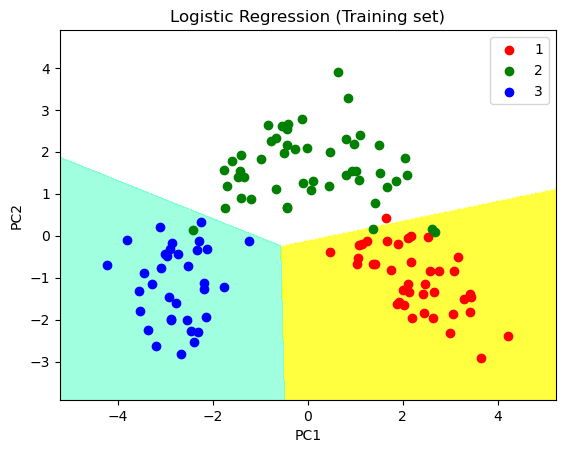

In [119]:
from matplotlib.colors import ListedColormap 
 
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, logr.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

C:\Users\Xiang Ze\AppData\Local\Temp\ipykernel_11056\1590122172.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


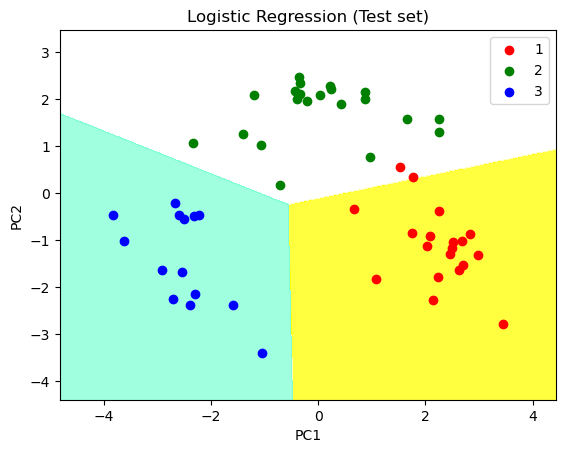

In [121]:
# Visualising the Test set results through scatter plot 

from matplotlib.colors import ListedColormap
 
X_set, y_set = X_test_pca, y_test
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, logr.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
 
# show scatter plot
plt.show()
# show scatter plot 


## Exercise 1. Take home test / challenge test

Repeat this exercise but this time do it without dimension reduction. What do you get?

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9444444444444444


## Random Forest Feature Selection
Let's do a guided walkthrough for a RF feature selection )(https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/)

---

In [19]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [20]:
# Load the iris dataset
iris = datasets.load_iris()

# Create a list of feature names
feat_labels = ['Sepal Length','Sepal Width','Petal Length','Petal Width']

# Create X from the features
X = iris.data

# Create y from output
y = iris.target

In [21]:
# View the features
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [22]:
# View the target data
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
# Split the data into 40% test and 60% training
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [24]:
from sklearn.ensemble import RandomForestClassifier 
# Create a random forest classifier
model = RandomForestClassifier(criterion="gini", max_depth = 2)

# Train the classifier
model.fit(X_train, y_train)

gini_importance = model.feature_importances_
print('Sepal Length', gini_importance[0])
print('Sepal Width', gini_importance[1])
print('Petal Length', gini_importance[2])
print('Petal Width', gini_importance[3])

Sepal Length 0.12883574204615036
Sepal Width 0.0027025199853343575
Petal Length 0.43459171536344887
Petal Width 0.4338700226050663


In [25]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
feature_selector = SelectFromModel(estimator=model, threshold=0.15)

# Train the selector
feature_selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=2), threshold=0.15)

In [26]:
# Print the names of the most important features
feature_selector.fit(X_train, y_train)
selected_feature_names = [iris.feature_names[i] for i in feature_selector.get_support(indices=True)]
print(selected_feature_names)

['petal length (cm)', 'petal width (cm)']


In [27]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

In [28]:
# Create a new random forest classifier for the most important features
new_model = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
new_model.fit(X_train_selected, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [29]:
# Apply the limited classifier to the test data
y_pred = model.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.8833333333333333

In [30]:
y_pred_two = new_model.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_two) 
print("Accuracy with selected features:", accuracy_selected)

Accuracy with selected features: 0.9


In [31]:
# Apply The Full Featured Classifier To The Test Data


# View The Accuracy Of Our Full Feature (4 Features) Model


In [32]:
# Apply The Full Featured Classifier To The Test Data

# View The Accuracy Of Our Limited Feature (2 Features) Model


## Exercise 2. Now repeat RF feature selection but now use the wine dataset



In [36]:
from sklearn.ensemble import RandomForestClassifier 
data = pd.read_csv("./Wine.csv")
X = data.drop('Customer_Segment', axis = 1)
y = data['Customer_Segment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
model = RandomForestClassifier(criterion="gini", max_depth = 2)

# Train the classifier
model.fit(X_train, y_train)
feature_selector = SelectFromModel(estimator=model, threshold=0.15)

# Train the selector
feature_selector.fit(X_train, y_train)
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)
new_model = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
new_model.fit(X_train_selected, y_train)

y_pred_two = new_model.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_two) 
print("Accuracy with selected features:", accuracy_selected)

Accuracy with selected features: 0.8888888888888888


## RFE Walkthrough

---

In [12]:
# Automatically select the features
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# create pipeline
model = DecisionTreeClassifier()
rfe = RFECV(estimator=model, step=1)
pipeline = Pipeline(steps=[('feature_selection', rfe), ('classifier', model)])

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

# report performance
print("Accuracy:", mean(scores), (std(scores)))

Accuracy: 0.882 0.026255158223353628


In [30]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
     print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 5.000
Column: 1, Selected False, Rank: 4.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 2.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 3.000


## Exercise 3. Now repeat RF feature selection but now use the iris dataset

---

In [38]:
#Starter code for Exercise 3
# Load libraries

from sklearn import datasets
import matplotlib.pyplot as plt 

# Load digits dataset
iris = datasets.load_iris()

# Create feature matrix
X = iris.data

# Create target vector
y = iris.target

# View the first observation's feature values
iris.data[0]


array([5.1, 3.5, 1.4, 0.2])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
model = RandomForestClassifier(criterion="gini", max_depth = 2)

# Train the classifier
model.fit(X_train, y_train)
feature_selector = SelectFromModel(estimator=model, threshold=0.15)

# Train the selector
feature_selector.fit(X_train, y_train)
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)
new_model = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
new_model.fit(X_train_selected, y_train)

y_pred_two = new_model.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_two) 
print("Accuracy with selected features:", accuracy_selected)

Accuracy with selected features: 0.9


## t-SNE Walkthrough (https://cmdlinetips.com/2019/07/dimensionality-reduction-with-tsne/)

---


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [42]:
digits.data.shape

(1797, 64)

In [43]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [45]:
data_X = digits.data[:600]
y = digits.target[:600]

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(data_X)
tsne_obj

array([[-33.064045 ,  11.775319 ],
       [ 17.76624  ,   5.4796257],
       [  8.055402 ,   5.8756485],
       ...,
       [ 18.094622 , -16.057703 ],
       [  5.6653833,  37.35514  ],
       [ -7.595555 ,   3.655271 ]], dtype=float32)

In [25]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],'Y':tsne_obj[:,1],'digit':y})
tsne_df.head()

,X,Y,digit
0,-33.064045,11.775319,0
1,17.766239,5.479626,1
2,8.055402,5.875648,2
3,-18.861454,-8.514892,3
4,30.009453,2.323586,4


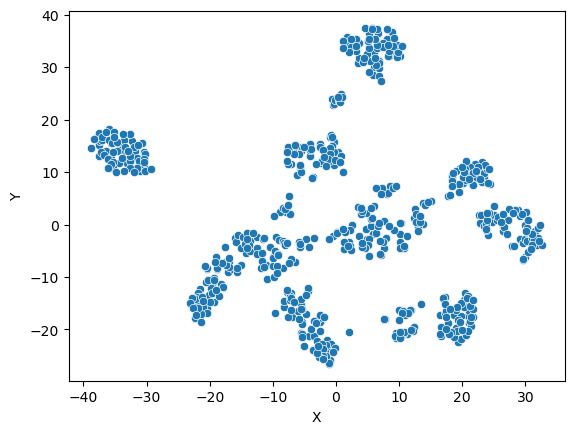

In [20]:
import seaborn as sns
sns.scatterplot(x="X", y="Y", data=tsne_df);

<Axes: xlabel='X', ylabel='Y'>

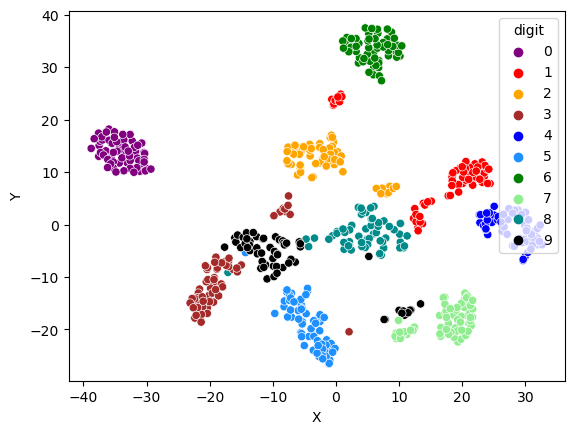

In [28]:
sns.scatterplot(x="X", y="Y",hue="digit",
                palette=['purple','red','orange','brown','blue','dodgerblue','green','lightgreen','darkcyan', 'black'],
                legend='full',data=tsne_df)

## Exercise 4. Now repeat t-SNE feature selection but now use the iris dataset

---

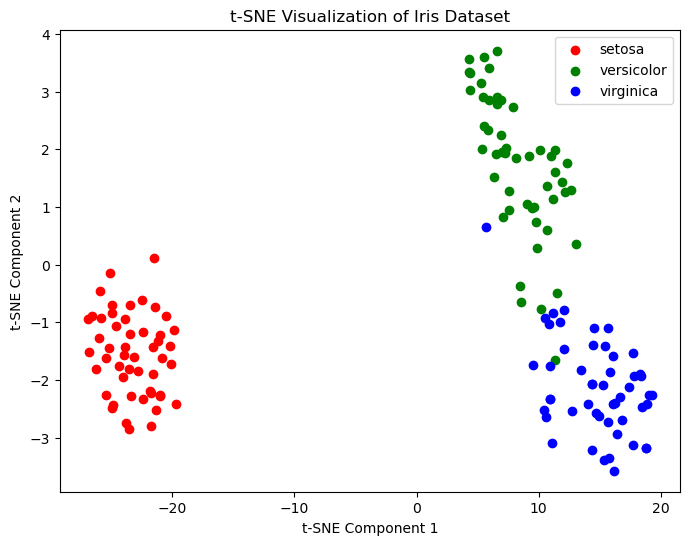

In [47]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(len(colors)):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], c=colors[i], label=iris.target_names[i])

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Iris Dataset')
plt.legend()
plt.show()